In [98]:
import pandas as pd

In [99]:
df = pd.read_csv("/Users/kevinjoo/df_main.csv", delimiter="\t")
df = df.set_index("Team_Name")

In [100]:
df.head()

,GP,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,OR,DR,REB,AST,STL,BLK,TO,PF,WP,Season
Team_Name,,,,,,,,,,,,,,,,,,,,,
Milwaukee Bucks,72,120.1,44.7,91.8,48.7,14.4,37.1,38.9,16.2,21.4,...,10.3,37.8,48.1,25.5,8.1,4.6,13.4,17.3,0.639,'20 - '21
Brooklyn Nets,72,118.6,43.1,87.3,49.4,14.2,36.1,39.2,18.1,22.5,...,8.9,35.5,44.4,26.8,6.7,5.3,13.1,19.0,0.667,'20 - '21
Washington Wizards,72,116.6,43.2,90.9,47.5,10.2,29.0,35.1,20.1,26.2,...,9.7,35.5,45.2,25.5,7.3,4.1,13.9,21.6,0.472,'20 - '21
Utah Jazz,72,116.4,41.3,88.1,46.8,16.7,43.0,38.9,17.2,21.5,...,10.6,37.6,48.3,23.7,6.6,5.2,13.5,18.5,0.722,'20 - '21
Portland Trail Blazers,72,116.1,41.3,91.1,45.3,15.7,40.8,38.5,17.8,21.6,...,10.6,33.9,44.5,21.3,6.9,5.0,10.8,18.9,0.583,'20 - '21


In [101]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [102]:
#sns.pairplot(df)

In [103]:
X = df[["PTS", "FGM", "FGA", "FG%", "3PM", "3PA", "3P%", "FTM", "FTA", "FT%", "OR", "DR", "REB", "AST", "STL", "BLK", "TO", "PF"]]


In [104]:
y = df.WP

In [105]:
# Split into train, val, and test
X, X_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=40)

In [106]:
# Fit a simple linear regression on training set
lr = LinearRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train)

0.7948565324646218

In [107]:
# Score on validation set
lr.score(X_val,y_val)

0.8307991551573009

In [108]:
from sklearn.preprocessing import PolynomialFeatures

In [109]:
# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)

# Apply polynomial transformation to val set
X_val_poly = poly.transform(X_val)

# Fit a model using polynomial features
lr_poly = LinearRegression()
lr_poly.fit(X_train_poly,y_train)
lr_poly.score(X_train_poly,y_train)

0.83625737783989

In [110]:
lr_poly.score(X_val_poly, y_val)

0.4472485231645176

In [111]:
from sklearn.linear_model import LassoCV, RidgeCV

In [112]:
scaler = StandardScaler()
X_train_poly_scaled = scaler.fit_transform(X_train_poly)

# Apply the same scaler to val set
X_val_poly_scaled = scaler.transform(X_val_poly)

# Fit a LASSO model using polynomial features
lasso = LassoCV()
lasso.fit(X_train_poly_scaled,y_train)
lasso.score(X_train_poly_scaled,y_train)

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005537104625785716, tolerance: 0.000520110149632353
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0005975773341950763, tolerance: 0.000520110149632353
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0007476636096983569, tolerance: 0.000520110149632353
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/envs/metis/lib/python3.8/

0.7995209595790302

In [113]:
lasso.score(X_val_poly_scaled, y_val)

0.8290009192904452

In [137]:
lasso.get_feature_names()

AttributeError: 'LassoCV' object has no attribute 'get_feature_names'

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [115]:
vif = pd.DataFrame()
vif['variables'] = X.columns
vif['vif'] =[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,variables,vif
0,PTS,1.760909e+06
1,FGM,1.044110e+06
2,FGA,4.563192e+04
3,FG%,4.528718e+04
4,3PM,1.415170e+04
5,3PA,4.031622e+03
6,3P%,3.433395e+03
7,FTM,8.755687e+04
8,FTA,3.607091e+04
9,FT%,3.714382e+04


In [116]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)

In [117]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.1, random_state=42)



In [118]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

In [119]:
lin_reg_est = LinearRegression()

scores = cross_val_score(lin_reg_est, X_train, y_train, cv=kfold)
print(scores)
print("Linear Reg Mean Score: ", np.mean(scores))

[0.74347548 0.78119653 0.80416038 0.77312461 0.82209567]
Linear Reg Mean Score:  0.7848105319521108


In [120]:
lin_reg_est.fit(X_train, y_train)

LinearRegression()

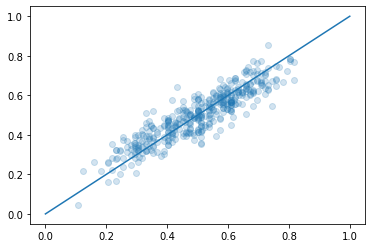

In [121]:
y_train_pred = lin_reg_est.predict(X_train)

plt.scatter(y_train, y_train_pred, alpha=0.2)
plt.plot([0, 1], [0, 1])

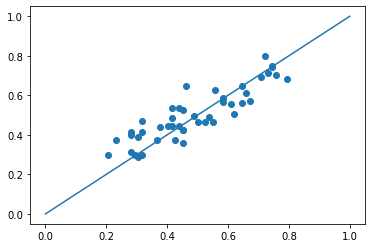

In [122]:
y_test_pred = lin_reg_est.predict(X_holdout)

plt.scatter(y_holdout, y_test_pred)
plt.plot([0, 1], [0, 1])

Text(0, 0.5, 'Residuals')

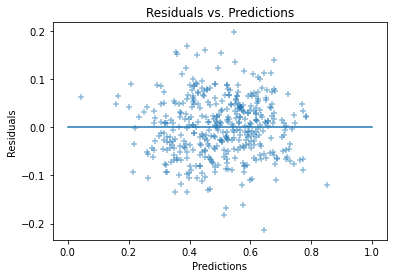

In [143]:
lin_reg_residuals = y_train - y_train_pred

plt.scatter(y_train_pred, lin_reg_residuals, marker="+", alpha=0.5)
plt.plot([0,1], [0, 0])
plt.title("Residuals vs. Predictions")
plt.xlabel("Predictions")
plt.ylabel("Residuals")

In [124]:
grid_est.best_estimator_

Lasso(alpha=0.000412847323771536)

In [125]:
params['alpha']

array([1.00000000e-04, 1.60421716e-04, 2.57351270e-04, 4.12847324e-04,
       6.62296762e-04, 1.06246783e-03, 1.70442913e-03, 2.73427446e-03,
       4.38637001e-03, 7.03669004e-03, 1.12883789e-02, 1.81090112e-02,
       2.90507865e-02, 4.66037703e-02, 7.47625680e-02, 1.19935395e-01,
       1.92402418e-01, 3.08655261e-01, 4.95150067e-01, 7.94328235e-01])

In [126]:
np.array(X)

array([[111.3,  40.1,  85.1, ...,   4. ,  14.6,  20.4],
       [101.5,  37.8,  77.7, ...,   5.8,  13.7,  22.1],
       [ 93.2,  37.3,  84.1, ...,   4.7,  12.6,  18.4],
       ...,
       [115.1,  43.3,  89.2, ...,   4.5,  12.8,  19.1],
       [104.3,  39.5,  85.4, ...,   5. ,  14.9,  21.8],
       [ 94.9,  35.9,  78.2, ...,   4.4,  13. ,  21. ]])

In [127]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [128]:
model = linear_model.LinearRegression()

In [129]:
model.fit(X_train, y_train)

LinearRegression()

In [130]:
Y_pred = model.predict(X_test)

In [140]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error (MSE):", mean_squared_error(y_test, Y_pred))
print("Coefficient of Determination (R^2):", r2_score(y_test, Y_pred))

Coefficients: [ 0.09283481 -0.10093272 -0.07948285 -0.03455448 -0.08694555  0.00422897
  0.01181866 -0.09601566  0.00154172  0.0074598   0.04663541  0.02444204
  0.02192447  0.00902719  0.05779492  0.00689986 -0.05339097  0.00169661]
Intercept: 2.197145603361833
Mean Squared Error (MSE): 0.005228883573799033
Coefficient of Determination (R^2): 0.8089585655315511


/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/relational.py:651: UserWarning: You passed a edgecolor/edgecolors ('w') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  points = ax.scatter(*args, **kws)


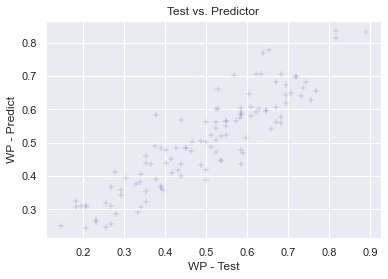

In [180]:
sns.scatterplot(y_test, Y_pred, marker="+", alpha=0.5)
sns.set(style="darkgrid")
plt.title("Test vs. Predictor")
plt.xlabel("WP - Test")
plt.ylabel("WP - Predict")
plt.show()

In [172]:
y_test.head()

Team_Name
Boston Celtics         0.591
Dallas Mavericks       0.583
Seattle SuperSonics    0.378
Toronto Raptors        0.329
Boston Celtics         0.500
Name: WP, dtype: float64

In [174]:
Y_pred

array([0.46781031, 0.57282595, 0.39027585, 0.37559138, 0.56295901,
       0.29293791, 0.38730419, 0.58159112, 0.62005287, 0.83532719,
       0.703775  , 0.83031735, 0.43949106, 0.30622902, 0.2425076 ,
       0.81319835, 0.41876214, 0.48406673, 0.44577545, 0.4356258 ,
       0.59456627, 0.66465859, 0.36391208, 0.76749821, 0.59240243,
       0.41179626, 0.47356615, 0.43492864, 0.43780247, 0.56237292,
       0.30544296, 0.30847538, 0.60434118, 0.248672  , 0.48736104,
       0.37062504, 0.50119463, 0.5015645 , 0.43295539, 0.54358178,
       0.31856374, 0.4824531 , 0.31103046, 0.478886  , 0.69982653,
       0.66048961, 0.41877611, 0.3939613 , 0.36781764, 0.35514265,
       0.7063421 , 0.25630358, 0.60076322, 0.35845456, 0.31139797,
       0.44788764, 0.53932936, 0.46055073, 0.4825297 , 0.32185455,
       0.56745738, 0.52033885, 0.56448214, 0.34334454, 0.30693435,
       0.64659935, 0.56038341, 0.58339512, 0.5786914 , 0.64280941,
       0.40083527, 0.60514721, 0.50566003, 0.28690133, 0.40850

In [147]:
import statsmodels.api as sm

model_1 = sm.OLS(y_train, sm.add_constant(X_train)).fit()
model_1.summary()

/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     WP   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     93.98
Date:                Tue, 12 Oct 2021   Prob (F-statistic):          2.66e-129
Time:                        05:50:46   Log-Likelihood:                 551.77
No. Observations:                 408   AIC:                            -1066.
Df Residuals:                     389   BIC:                            -989.3
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1971      1.889      1.163      0.246      -1.517       5.911
PTS            0.0928      0.044      2.131      0.034       0.007       0.178
FGM           -0.1009      0.090     -1.125      0.261      -0.277       0.075
FGA           -0.0795      0.021     -3.703      0.000      -0.122      -0.037
FG%           -0.0346      0.039     -0.897      0.370      -0.110       0.041
3PM           -0.0869      0.049     -1.781      0.076      -0.183       0.009
3PA            0.0042      0.009      0.473      0.637      -0.013       0.022
3P%            0.0118      0.005      2.219      0.027       0.001       0.022
FTM           -0.0960      0.052     -1.835      0.067      -0.199       0.007
FTA            0.0015      0.028      0.056      0.956      -0.053       0.056
FT%            0.0075      0.009      0.829      0.408      -0.010       0.025
OR             0.0466      0.065      0.713      0.476      -0.082       0.175
DR             0.0244      0.065      0.375      0.708      -0.104       0.153
REB            0.0219      0.065      0.337      0.736      -0.106       0.150
AST            0.0090      0.002      3.869      0.000       0.004       0.014
STL            0.0578      0.004     13.118      0.000       0.049       0.066
BLK            0.0069      0.004      1.557      0.120      -0.002       0.016
TO            -0.0534      0.003    -15.326      0.000      -0.060      -0.047
PF             0.0017      0.003      0.656      0.512      -0.003       0.007
==============================================================================
Omnibus:                        0.464   Durbin-Watson:                   2.246
Prob(Omnibus):                  0.793   Jarque-Bera (JB):                0.275
Skew:                          -0.001   Prob(JB):                        0.871
Kurtosis:                       3.127   Cond. No.                     1.09e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.09e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [148]:
influence = model_1.get_influence()
inf_summary = influence.summary_frame()
leverage = influence.hat_matrix_diag
import matplotlib.pyplot as plt

Text(0, 0.5, 'Studentized Residuals')

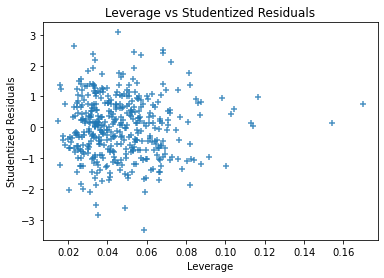

In [150]:
sns.regplot(leverage, model_1.resid_pearson, fit_reg=False, marker="+")
plt.title('Leverage vs Studentized Residuals')
plt.xlabel('Leverage')
plt.ylabel('Studentized Residuals')